<a href="https://colab.research.google.com/github/arindamkeswani/RePlicate/blob/main/RePlicate_(HPC_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observations and assumptions so far:
1. Since an online plag checker would work on a cloud platform, we abandoned local testing in favour of a platform like Colab, as that would give results that are more realistic
2. Major tests done include comparing the execution time taken by:
  1. Serial implementation (for base time)
  2. Multiprocessing library (for base data-parallelism time)
  3. Psuedo data-parallelism (purely for research portion)
  4. Numba library (for potential in-built optimum time)

3. Other libraries, such as iparallel are performing worse than expected, and worse than serial implementation, so they were left out of the final analysis

4. Numba gives a significant improvement with caching.

5. Text files will be fed as input to the program (to be serially or manually converted beforehand since this project focusses of parallel plagiarism, detection, not conversion)

6. Final output will consist of two parts from the perspective of:
 1. Product: Dataframe/spreadsheet type structure, showing level of plagiarism between files
 2. Reasearch: A time/speed-up based comparison between the aforementioned methodologies.

 Original outcome expected data parallelism to perform better, but that is not the case, hence a black implemetation had to be adopted for successful completion.

6. Files are either in .pdf or .txt format

---

Implementation:
1. First part involves building the plag-checker and applying the various devised methodologies.
2. The next step is building a PDF-to-text converter. The goal is to build a simple converter but if time permits, it will be implemented in parallel. 
3. The aim of the project is to create the first two modules.
4. Remaining implementation involves increasing size of dataset even further (to approximately 50 files) and trying to reduce the time taken during conversion of .pdf files to a readable format (.txt), and comparing the time taken in both modules for the final analysis, along with adding {maximum plag} and {average plag} columns in the output.

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving Capitalism.pdf to Capitalism.pdf
Saving Cloud1.pdf to Cloud1.pdf
Saving Cloud2.pdf to Cloud2.pdf
Saving Cloud3(Lang).pdf to Cloud3(Lang).pdf
Saving fatma.txt to fatma.txt
Saving Foucault1.pdf to Foucault1.pdf
Saving Foucault2.pdf to Foucault2.pdf
Saving Foucault3.pdf to Foucault3.pdf
Saving Foucault4.pdf to Foucault4.pdf
Saving Foucault5.pdf to Foucault5.pdf
Saving Foucault6.pdf to Foucault6.pdf
Saving Foucault7.pdf to Foucault7.pdf
Saving Foucault8.pdf to Foucault8.pdf
Saving Gender1.pdf to Gender1.pdf
Saving john.txt to john.txt
Saving juma.txt to juma.txt
Saving ML1.pdf to ML1.pdf
Saving ML2.pdf to ML2.pdf
Saving PatFem1.txt to PatFem1.txt
Saving PatFem3.pdf to PatFem3.pdf
Saving PatFem4.pdf to PatFem4.pdf
Saving Shake1.pdf to Shake1.pdf
Saving Shake2.pdf to Shake2.pdf
Saving Shake3.pdf to Shake3.pdf
Saving Shake4.pdf to Shake4.pdf
Saving Shake5.pdf to Shake5.pdf
Saving Shake6.pdf to Shake6.pdf
Saving Shake7.pdf to Shake7.pdf
Saving Shake8.pdf to Shake8.pdf
Saving Shake9.pdf 

# **Module 1: Plag-checker**

In [2]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time
import pandas as pd
from numba import jit
from numba import njit
# from numba.typed import List
from os import system
import sys
from numpy import dot #Alt for cosine similarity
from numpy.linalg import norm #Alt for cosine similarity

In [8]:
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')] #store all text files
student_notes =[open(File).read() for File in  student_files] #stores all lines of all files

In [9]:
vectorize = lambda Text: TfidfVectorizer().fit_transform(Text).toarray()  #to vectorize the words of text files
# similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents

In [10]:
vectors = vectorize(student_notes) #store vectorized values
s_vectors = list(zip(student_files, vectors)) #store it with file names
# plagiarism_results = set() #to store results in a set
plagiarism_results =[]
# s_vectors

In [11]:
def similarity(doc1, doc2):
  return cosine_similarity([doc1, doc2])

In [12]:
def check_plagiarism(s_vectors_partial):
    # similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2]) #to store similarity of two documents
    plagiarism_results =[]
    
    sys.stdout.write("\r"+"Starting process...")
    global s_vectors
    for student_a, text_vector_a in s_vectors_partial:  #traverse through students and their vectors (for first document)
        # print(f"Started testing:{student_a}")
        # print("Started testing:",student_a)
        sys.stdout.write("\r"+"Started testing:"+student_a) # Cursor up one line
        # time.sleep(1)
        new_vectors = s_vectors.copy() 
        
        # current_index = new_vectors.index((student_a, text_vector_a))
        # del new_vectors[current_index]
        

        for student_b , text_vector_b in new_vectors: #traverse through students and their vectors (for second document)
            # print(f"Testing {student_a} against {student_b}")
            # print("Testing",student_a,"against",student_b)
            sys.stdout.write("\r"+"Testing: "+student_a+" | Against: "+student_b) # Cursor up one line
            # time.sleep(1)
            # sim_score = similarity(text_vector_a, text_vector_b)[0][1] #calculate similarity of both documents
            sim_score = dot(text_vector_a, text_vector_b)/(norm(text_vector_a)*norm(text_vector_b))
            # sim_score = cosine_similarity([text_vector_a, text_vector_b])[0][1]#########################Uncomment it later
            # student_pair = sorted((student_a, student_b)) 
            student_pair = (student_a, student_b) 
            # score = (student_pair[0], student_pair[1],sim_score)
            score = [student_pair[0], student_pair[1],sim_score]
            # plagiarism_results.add(score) #add score with file names into the set
            plagiarism_results.append(score)
            # print("Finished testing",student_a,"against",student_b)
        sys.stdout.write("\r"+"Finished testing: "+student_a)
        sys.stdout.write("\r")
        # print()
    sys.stdout.write("\r"+"Testing complete!")
    return plagiarism_results  
    # return createTable(plagiarism_results)

def createTable(ans):
    df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)

    for data in ans:
      for rowName in range(len(student_files)):
        if df.index[rowName]==data[0]:
          r=rowName
          for colName in range(len(student_files)):
            if df.index[colName]==data[1]:
              c=colName

              df.iloc[r,c] = data[2]
    return df

In [51]:
#Serial
%%time
start=time.time()
ans=check_plagiarism(s_vectors)
# df=createTable(ans)

end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.788175106048584
CPU times: user 621 ms, sys: 472 ms, total: 1.09 s
Wall time: 788 ms


In [52]:
df=createTable(ans)
df

,Shake8.txt,Foucault2.txt,Foucault6.txt,Sports2.txt,fatma.txt,Cloud3(Lang).txt,Shake7.txt,Sports5.txt,Cloud1.txt,Foucault5.txt,Sports8.txt,Cloud2.txt,Gender1.txt,Stars3.txt,Stars1.txt,john.txt,Foucault4.txt,Web1.txt,Shake9.txt,Foucault8.txt,Capitalism.txt,Shake5.txt,Shake1.txt,Shake2.txt,Stars2.txt,Shake3.txt,Sports9.txt,Shake6.txt,PatFem1.txt,Stars6.txt,Foucault1.txt,Foucault3.txt,Web3.txt,Foucault7.txt,PatFem3.txt,Sports10.txt,Stars4.txt,ML1.txt,juma.txt,Sports4.txt,Shake4.txt,Sports6.txt,PatFem4.txt,Sports7.txt,Shake10.txt,Sports3.txt,Sports1.txt,ML2.txt
Shake8.txt,1.000000,0.421978,0.270872,0.377291,0.156240,0.039530,0.335994,0.286040,0.007008,0.377850,0.003499,0.331202,0.346135,0.056923,0.054731,0.077208,0.272331,0.031700,0.939650,0.357113,0.354159,0.431953,0.267034,0.461508,0.070362,0.277225,0.146440,0.356852,0.375518,0.067403,0.359867,0.417928,0.003496,0.411741,0.055908,0.005057,0.118312,0.336966,0.138495,0.373766,0.424795,0.145779,0.379287,0.000000,0.577127,0.010942,0.333018,0.036699
Foucault2.txt,0.421978,1.000000,0.637492,0.642969,0.176741,0.056003,0.588800,0.555139,0.011084,0.762025,0.000497,0.561376,0.639453,0.065875,0.051283,0.086062,0.570148,0.053974,0.425297,0.755199,0.674020,0.725948,0.358726,0.725657,0.056522,0.316563,0.186170,0.474931,0.696201,0.083793,0.723215,0.863111,0.007313,0.796039,0.116575,0.008771,0.172921,0.609380,0.144538,0.611412,0.530828,0.161759,0.708680,0.003395,0.561426,0.015771,0.524914,0.023798
Foucault6.txt,0.270872,0.637492,1.000000,0.431098,0.131135,0.039942,0.413876,0.362441,0.007149,0.545951,0.000000,0.359266,0.388038,0.037457,0.026364,0.090941,0.386736,0.056938,0.276374,0.526202,0.456587,0.462777,0.215509,0.475010,0.029070,0.225828,0.133773,0.332339,0.464194,0.050954,0.550680,0.595132,0.004952,0.537203,0.069529,0.005985,0.109793,0.397914,0.164045,0.439530,0.341771,0.092866,0.488027,0.003469,0.367640,0.010318,0.332204,0.018888
Sports2.txt,0.377291,0.642969,0.431098,1.000000,0.149043,0.039600,0.473934,0.503942,0.010183,0.623282,0.008055,0.483487,0.544250,0.055869,0.042719,0.060536,0.437656,0.037033,0.378299,0.540761,0.558293,0.576689,0.279663,0.607730,0.045975,0.286696,0.193740,0.400835,0.569895,0.070072,0.579114,0.655093,0.003794,0.627715,0.097238,0.011645,0.143447,0.535105,0.121459,0.540590,0.439976,0.203994,0.587094,0.011016,0.497583,0.012520,0.513005,0.023128
fatma.txt,0.156240,0.176741,0.131135,0.149043,1.000000,0.018982,0.136171,0.099435,0.001101,0.132509,0.000000,0.119569,0.110548,0.012787,0.012610,0.129807,0.105788,0.010158,0.159572,0.141047,0.130786,0.128186,0.084072,0.148580,0.016248,0.095474,0.138956,0.113349,0.150836,0.047420,0.136680,0.136692,0.007515,0.139016,0.000000,0.001363,0.050579,0.120677,0.165593,0.209889,0.149795,0.044340,0.158589,0.000000,0.208720,0.002156,0.129599,0.008668
Cloud3(Lang).txt,0.039530,0.056003,0.039942,0.039600,0.018982,1.000000,0.043033,0.038791,0.026384,0.070081,0.000000,0.519350,0.050709,0.009477,0.008832,0.002929,0.041209,0.015475,0.039282,0.052463,0.051626,0.057033,0.061975,0.050558,0.008233,0.018098,0.016204,0.034511,0.047815,0.013160,0.095557,0.057200,0.009445,0.049943,0.005328,0.003718,0.015109,0.062723,0.010670,0.047800,0.043844,0.013796,0.051264,0.000770,0.051256,0.003887,0.040525,0.005404
Shake7.txt,0.335994,0.588800,0.413876,0.473934,0.136171,0.043033,1.000000,0.392947,0.011932,0.523716,0.014348,0.392155,0.448863,0.049123,0.040992,0.045030,0.349729,0.034337,0.337861,0.460202,0.490720,0.542824,0.306316,0.580623,0.041322,0.266261,0.140254,0.430382,0.512914,0.077384,0.512822,0.554356,0.004996,0.543025,0.072484,0.006168,0.135260,0.429350,0.109383,0.459812,0.427981,0.107568,0.502244,0.000000,0.445321,0.010784,0.372673,0.024086
Sports5.txt,0.286040,0.555139,0.362441,0.503942,0.099435,0.038791,0.392947,1.000000,0.009843,0.567780,0.000227,0.428021,0.491676,0.049708,0.037058,0.063640,0.349336,0.031088,0.286450,0.447005,0.482732,0.504795,0.241529,0.515624,0.033452,0.209595,0.148589,0.319687,0.513305,0.068511,0.507786,0.580910,0.003976,0.557161,0.100

In [63]:
df_res=pd.DataFrame()
df_res["Max plag value"]= df.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res["Max plag doc"]= df.T.apply(lambda x: x.nlargest(2).idxmin())
df_res["Average plag"] = (df.sum(axis=1)-1) / (len(df)-1)
df_res

,Max plag value,Max plag doc,Average plag
Shake8.txt,0.939650,Shake9.txt,0.248530
Foucault2.txt,0.863111,Foucault3.txt,0.381782
Foucault6.txt,0.637492,Foucault2.txt,0.263069
Sports2.txt,0.655093,Foucault3.txt,0.319853
fatma.txt,0.209889,Sports4.txt,0.096320
Cloud3(Lang).txt,0.519350,Cloud2.txt,0.043394
Shake7.txt,0.588800,Foucault2.txt,0.280859
Sports5.txt,0.580910,Foucault3.txt,0.272836
Cloud1.txt,0.031333,Cloud2.txt,0.007769
Foucault5.txt,0.812901,Foucault3.txt,0.355581




---

Parallel [Manual] approach

Ways to achieve data parallelism:
1. Divide s_vectors in parts (more likely)
2. Divide s_vectors[0][1] in parts (potential)

In [20]:
#Parallel [Manual] Part 1
%%time
start=time.time()
ans=check_plagiarism(s_vectors[:len(s_vectors)//2])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.2851755619049072
CPU times: user 301 ms, sys: 215 ms, total: 516 ms
Wall time: 285 ms


In [21]:
dfm1=createTable(ans)
dfm1[:len(dfm1)//2][:]

,Shake8.txt,Foucault2.txt,Foucault6.txt,Sports2.txt,fatma.txt,Cloud3(Lang).txt,Shake7.txt,Sports5.txt,Cloud1.txt,Foucault5.txt,Sports8.txt,Cloud2.txt,Gender1.txt,Stars3.txt,Stars1.txt,john.txt,Foucault4.txt,Web1.txt,Shake9.txt,Foucault8.txt,Capitalism.txt,Shake5.txt,Shake1.txt,Shake2.txt,Stars2.txt,Shake3.txt,Sports9.txt,Shake6.txt,PatFem1.txt,Stars6.txt,Foucault1.txt,Foucault3.txt,Web3.txt,Foucault7.txt,PatFem3.txt,Sports10.txt,Stars4.txt,ML1.txt,juma.txt,Sports4.txt,Shake4.txt,Sports6.txt,PatFem4.txt,Sports7.txt,Shake10.txt,Sports3.txt,Sports1.txt,ML2.txt
Shake8.txt,1.000000,0.421978,0.270872,0.377291,0.156240,0.039530,0.335994,0.286040,0.007008,0.377850,0.003499,0.331202,0.346135,0.056923,0.054731,0.077208,0.272331,0.031700,0.939650,0.357113,0.354159,0.431953,0.267034,0.461508,0.070362,0.277225,0.146440,0.356852,0.375518,0.067403,0.359867,0.417928,0.003496,0.411741,0.055908,0.005057,0.118312,0.336966,0.138495,0.373766,0.424795,0.145779,0.379287,0.000000,0.577127,0.010942,0.333018,0.036699
Foucault2.txt,0.421978,1.000000,0.637492,0.642969,0.176741,0.056003,0.588800,0.555139,0.011084,0.762025,0.000497,0.561376,0.639453,0.065875,0.051283,0.086062,0.570148,0.053974,0.425297,0.755199,0.674020,0.725948,0.358726,0.725657,0.056522,0.316563,0.186170,0.474931,0.696201,0.083793,0.723215,0.863111,0.007313,0.796039,0.116575,0.008771,0.172921,0.609380,0.144538,0.611412,0.530828,0.161759,0.708680,0.003395,0.561426,0.015771,0.524914,0.023798
Foucault6.txt,0.270872,0.637492,1.000000,0.431098,0.131135,0.039942,0.413876,0.362441,0.007149,0.545951,0.000000,0.359266,0.388038,0.037457,0.026364,0.090941,0.386736,0.056938,0.276374,0.526202,0.456587,0.462777,0.215509,0.475010,0.029070,0.225828,0.133773,0.332339,0.464194,0.050954,0.550680,0.595132,0.004952,0.537203,0.069529,0.005985,0.109793,0.397914,0.164045,0.439530,0.341771,0.092866,0.488027,0.003469,0.367640,0.010318,0.332204,0.018888
Sports2.txt,0.377291,0.642969,0.431098,1.000000,0.149043,0.039600,0.473934,0.503942,0.010183,0.623282,0.008055,0.483487,0.544250,0.055869,0.042719,0.060536,0.437656,0.037033,0.378299,0.540761,0.558293,0.576689,0.279663,0.607730,0.045975,0.286696,0.193740,0.400835,0.569895,0.070072,0.579114,0.655093,0.003794,0.627715,0.097238,0.011645,0.143447,0.535105,0.121459,0.540590,0.439976,0.203994,0.587094,0.011016,0.497583,0.012520,0.513005,0.023128
fatma.txt,0.156240,0.176741,0.131135,0.149043,1.000000,0.018982,0.136171,0.099435,0.001101,0.132509,0.000000,0.119569,0.110548,0.012787,0.012610,0.129807,0.105788,0.010158,0.159572,0.141047,0.130786,0.128186,0.084072,0.148580,0.016248,0.095474,0.138956,0.113349,0.150836,0.047420,0.136680,0.136692,0.007515,0.139016,0.000000,0.001363,0.050579,0.120677,0.165593,0.209889,0.149795,0.044340,0.158589,0.000000,0.208720,0.002156,0.129599,0.008668
Cloud3(Lang).txt,0.039530,0.056003,0.039942,0.039600,0.018982,1.000000,0.043033,0.038791,0.026384,0.070081,0.000000,0.519350,0.050709,0.009477,0.008832,0.002929,0.041209,0.015475,0.039282,0.052463,0.051626,0.057033,0.061975,0.050558,0.008233,0.018098,0.016204,0.034511,0.047815,0.013160,0.095557,0.057200,0.009445,0.049943,0.005328,0.003718,0.015109,0.062723,0.010670,0.047800,0.043844,0.013796,0.051264,0.000770,0.051256,0.003887,0.040525,0.005404
Shake7.txt,0.335994,0.588800,0.413876,0.473934,0.136171,0.043033,1.000000,0.392947,0.011932,0.523716,0.014348,0.392155,0.448863,0.049123,0.040992,0.045030,0.349729,0.034337,0.337861,0.460202,0.490720,0.542824,0.306316,0.580623,0.041322,0.266261,0.140254,0.430382,0.512914,0.077384,0.512822,0.554356,0.004996,0.543025,0.072484,0.006168,0.135260,0.429350,0.109383,0.459812,0.427981,0.107568,0.502244,0.000000,0.445321,0.010784,0.372673,0.024086
Sports5.txt,0.286040,0.555139,0.362441,0.503942,0.099435,0.038791,0.392947,1.000000,0.009843,0.567780,0.000227,0.428021,0.491676,0.049708,0.037058,0.063640,0.349336,0.031088,0.286450,0.447005,0.482732,0.504795,0.241529,0.515624,0.033452,0.209595,0.148589,0.319687,0.513305,0.068511,0.507786,0.580910,0.003976,0.557161,0.100

In [22]:
#Parallel [Manual] Part 2
%%time
start=time.time()
ans=check_plagiarism(s_vectors[len(s_vectors)//2:])

# for data in ans:
#     print(data)
# print(createTable(ans))
end=time.time()
print()
print("Time taken:", end-start)

Testing complete!
Time taken: 0.29496216773986816
CPU times: user 281 ms, sys: 245 ms, total: 527 ms
Wall time: 295 ms


In [23]:
dfm2=createTable(ans)
dfm2[len(dfm1)//2:][:]

,Shake8.txt,Foucault2.txt,Foucault6.txt,Sports2.txt,fatma.txt,Cloud3(Lang).txt,Shake7.txt,Sports5.txt,Cloud1.txt,Foucault5.txt,Sports8.txt,Cloud2.txt,Gender1.txt,Stars3.txt,Stars1.txt,john.txt,Foucault4.txt,Web1.txt,Shake9.txt,Foucault8.txt,Capitalism.txt,Shake5.txt,Shake1.txt,Shake2.txt,Stars2.txt,Shake3.txt,Sports9.txt,Shake6.txt,PatFem1.txt,Stars6.txt,Foucault1.txt,Foucault3.txt,Web3.txt,Foucault7.txt,PatFem3.txt,Sports10.txt,Stars4.txt,ML1.txt,juma.txt,Sports4.txt,Shake4.txt,Sports6.txt,PatFem4.txt,Sports7.txt,Shake10.txt,Sports3.txt,Sports1.txt,ML2.txt
Stars2.txt,0.070362,0.056522,0.029070,0.045975,0.016248,0.008233,0.041322,0.033452,0.001694,0.036354,0.000000,0.060362,0.041403,0.347627,0.346704,0.014234,0.049146,0.022683,0.066518,0.060672,0.042785,0.046219,0.042780,0.049421,1.000000,0.038809,0.024996,0.029482,0.039884,0.051152,0.044319,0.049145,0.000733,0.053905,0.006023,0.000788,0.030583,0.044551,0.015381,0.058169,0.032840,0.036619,0.050998,0.001667,0.060466,0.006466,0.042228,0.038452
Shake3.txt,0.277225,0.316563,0.225828,0.286696,0.095474,0.018098,0.266261,0.209595,0.004875,0.283330,0.012663,0.235931,0.247205,0.036936,0.028426,0.050288,0.199111,0.017649,0.267305,0.264024,0.266674,0.255786,0.137647,0.286005,0.038809,1.000000,0.110658,0.226560,0.285184,0.034094,0.282333,0.288883,0.000913,0.300787,0.029569,0.002883,0.129968,0.247061,0.102579,0.290810,0.232757,0.076157,0.280919,0.000000,0.301730,0.006145,0.240340,0.018804
Sports9.txt,0.146440,0.186170,0.133773,0.193740,0.138956,0.016204,0.140254,0.148589,0.016257,0.150184,0.000000,0.140512,0.125460,0.018037,0.015715,0.023821,0.123911,0.017829,0.146637,0.161301,0.140322,0.145333,0.092727,0.169296,0.024996,0.110658,1.000000,0.115126,0.150932,0.026304,0.162263,0.170344,0.004838,0.164673,0.013613,0.007018,0.059604,0.159185,0.073984,0.289265,0.134539,0.162345,0.180494,0.000000,0.192594,0.006152,0.206099,0.005288
Shake6.txt,0.356852,0.474931,0.332339,0.400835,0.113349,0.034511,0.430382,0.319687,0.006176,0.441668,0.000000,0.324368,0.384766,0.041266,0.030485,0.026948,0.297265,0.029792,0.350406,0.370053,0.410257,0.561153,0.375286,0.612476,0.029482,0.226560,0.115126,1.000000,0.418465,0.048243,0.414177,0.453406,0.004207,0.437536,0.060488,0.004852,0.123127,0.361057,0.085770,0.383894,0.447471,0.088481,0.412090,0.000000,0.448873,0.009580,0.331078,0.016261
PatFem1.txt,0.375518,0.696201,0.464194,0.569895,0.150836,0.047815,0.512914,0.513305,0.009577,0.659632,0.000314,0.495836,0.650991,0.054686,0.042830,0.065811,0.426277,0.046394,0.380110,0.560550,0.585582,0.636430,0.312459,0.639062,0.039884,0.285184,0.150932,0.418465,1.000000,0.078885,0.600718,0.694677,0.006134,0.671511,0.107500,0.007437,0.201493,0.542658,0.113514,0.554935,0.488257,0.118387,0.658185,0.000000,0.496491,0.013568,0.474455,0.024539
Stars6.txt,0.067403,0.083793,0.050954,0.070072,0.047420,0.013160,0.077384,0.068511,0.002596,0.071348,0.000000,0.079675,0.070455,0.046736,0.074434,0.013255,0.066896,0.009083,0.067385,0.086516,0.070890,0.069993,0.057737,0.078888,0.051152,0.034094,0.026304,0.048243,0.078885,1.000000,0.067804,0.074882,0.002414,0.077316,0.005317,0.001110,0.038797,0.068075,0.015379,0.086726,0.067566,0.033532,0.081487,0.001721,0.081996,0.004590,0.053753,0.034264
Foucault1.txt,0.359867,0.723215,0.550680,0.579114,0.136680,0.095557,0.512822,0.507786,0.009111,0.683964,0.000428,0.491020,0.544314,0.054352,0.042757,0.078992,0.455137,0.043746,0.362900,0.597433,0.602496,0.607557,0.309353,0.630432,0.044319,0.282333,0.162263,0.414177,0.600718,0.067804,1.000000,0.724290,0.004352,0.677689,0.106611,0.009052,0.146728,0.546988,0.156690,0.544490,0.452671,0.122746,0.633919,0.000000,0.485175,0.013845,0.463740,0.020195
Foucault3.txt,0.417928,0.863111,0.595132,0.655093,0.136692,0.057200,0.554356,0.580910,0.012023,0.812901,0.000755,0.575490,0.649290,0.063879,0.049822,0.090778,0.560119,0.052467,0.420625,0.737618,0.681665,0.721109,0.365814,0.728053,0.049145,0.288883,0.170344,0.453406,0.694677,0.074882,0.724290,1.000000,0.005162,0.801574,0.130040,0



---





---

Multiprocessing approach

In [ ]:
# s_vectors[:len(s_vectors)//2]

In [24]:
#Multiprocessing approach
%%time
import multiprocessing
import os

# def worker1(func1): 
#   func1(m)
  

start=time.time()

pool = multiprocessing.Pool(processes=2) 



l1 = s_vectors[:len(s_vectors)//2]
l2 = s_vectors[len(s_vectors)//2:]

start=time.time()

result = pool.map(check_plagiarism, [l1,l2])

for i in result:
  print(i)

# print(createTable(result))
# print(result)

end=time.time()

# ty.append("Multiprocessing [50000 elements]")
# t.append(end-start)

print("Time taken: ",end-start)

[['Shake8.txt', 'Shake8.txt', 1.0], ['Shake8.txt', 'Foucault2.txt', 0.421977668745168], ['Shake8.txt', 'Foucault6.txt', 0.27087195562510147], ['Shake8.txt', 'Sports2.txt', 0.3772914364429918], ['Shake8.txt', 'fatma.txt', 0.15623981972964765], ['Shake8.txt', 'Cloud3(Lang).txt', 0.03953049806495002], ['Shake8.txt', 'Shake7.txt', 0.3359937352337509], ['Shake8.txt', 'Sports5.txt', 0.28604047961135914], ['Shake8.txt', 'Cloud1.txt', 0.007007538670284866], ['Shake8.txt', 'Foucault5.txt', 0.3778503503661951], ['Shake8.txt', 'Sports8.txt', 0.0034988998701010092], ['Shake8.txt', 'Cloud2.txt', 0.33120190975396413], ['Shake8.txt', 'Gender1.txt', 0.346135266281909], ['Shake8.txt', 'Stars3.txt', 0.05692254267336526], ['Shake8.txt', 'Stars1.txt', 0.05473145385844218], ['Shake8.txt', 'john.txt', 0.07720832799051183], ['Shake8.txt', 'Foucault4.txt', 0.27233067019114215], ['Shake8.txt', 'Web1.txt', 0.03170013482088133], ['Shake8.txt', 'Shake9.txt', 0.9396503393491694], ['Shake8.txt', 'Foucault8.txt', 0.



---

Numba approach

In [25]:
#Numba approach
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [68]:
%%time
start=time.time()
# try:

num_res= jit(parallel=True)(check_plagiarism)


end=time.time()


CPU times: user 294 µs, sys: 51 µs, total: 345 µs
Wall time: 352 µs


In [70]:
%%time
a=num_res(s_vectors)

Testing complete!CPU times: user 431 ms, sys: 326 ms, total: 757 ms
Wall time: 405 ms


In [ ]:
#3.4 sec
#531ms

In [44]:
df2=createTable(a)
df2

,Shake8.txt,Foucault2.txt,Foucault6.txt,Sports2.txt,fatma.txt,Cloud3(Lang).txt,Shake7.txt,Sports5.txt,Cloud1.txt,Foucault5.txt,Sports8.txt,Cloud2.txt,Gender1.txt,Stars3.txt,Stars1.txt,john.txt,Foucault4.txt,Web1.txt,Shake9.txt,Foucault8.txt,Capitalism.txt,Shake5.txt,Shake1.txt,Shake2.txt,Stars2.txt,Shake3.txt,Sports9.txt,Shake6.txt,PatFem1.txt,Stars6.txt,Foucault1.txt,Foucault3.txt,Web3.txt,Foucault7.txt,PatFem3.txt,Sports10.txt,Stars4.txt,ML1.txt,juma.txt,Sports4.txt,Shake4.txt,Sports6.txt,PatFem4.txt,Sports7.txt,Shake10.txt,Sports3.txt,Sports1.txt,ML2.txt
Shake8.txt,1.000000,0.421978,0.270872,0.377291,0.156240,0.039530,0.335994,0.286040,0.007008,0.377850,0.003499,0.331202,0.346135,0.056923,0.054731,0.077208,0.272331,0.031700,0.939650,0.357113,0.354159,0.431953,0.267034,0.461508,0.070362,0.277225,0.146440,0.356852,0.375518,0.067403,0.359867,0.417928,0.003496,0.411741,0.055908,0.005057,0.118312,0.336966,0.138495,0.373766,0.424795,0.145779,0.379287,0.000000,0.577127,0.010942,0.333018,0.036699
Foucault2.txt,0.421978,1.000000,0.637492,0.642969,0.176741,0.056003,0.588800,0.555139,0.011084,0.762025,0.000497,0.561376,0.639453,0.065875,0.051283,0.086062,0.570148,0.053974,0.425297,0.755199,0.674020,0.725948,0.358726,0.725657,0.056522,0.316563,0.186170,0.474931,0.696201,0.083793,0.723215,0.863111,0.007313,0.796039,0.116575,0.008771,0.172921,0.609380,0.144538,0.611412,0.530828,0.161759,0.708680,0.003395,0.561426,0.015771,0.524914,0.023798
Foucault6.txt,0.270872,0.637492,1.000000,0.431098,0.131135,0.039942,0.413876,0.362441,0.007149,0.545951,0.000000,0.359266,0.388038,0.037457,0.026364,0.090941,0.386736,0.056938,0.276374,0.526202,0.456587,0.462777,0.215509,0.475010,0.029070,0.225828,0.133773,0.332339,0.464194,0.050954,0.550680,0.595132,0.004952,0.537203,0.069529,0.005985,0.109793,0.397914,0.164045,0.439530,0.341771,0.092866,0.488027,0.003469,0.367640,0.010318,0.332204,0.018888
Sports2.txt,0.377291,0.642969,0.431098,1.000000,0.149043,0.039600,0.473934,0.503942,0.010183,0.623282,0.008055,0.483487,0.544250,0.055869,0.042719,0.060536,0.437656,0.037033,0.378299,0.540761,0.558293,0.576689,0.279663,0.607730,0.045975,0.286696,0.193740,0.400835,0.569895,0.070072,0.579114,0.655093,0.003794,0.627715,0.097238,0.011645,0.143447,0.535105,0.121459,0.540590,0.439976,0.203994,0.587094,0.011016,0.497583,0.012520,0.513005,0.023128
fatma.txt,0.156240,0.176741,0.131135,0.149043,1.000000,0.018982,0.136171,0.099435,0.001101,0.132509,0.000000,0.119569,0.110548,0.012787,0.012610,0.129807,0.105788,0.010158,0.159572,0.141047,0.130786,0.128186,0.084072,0.148580,0.016248,0.095474,0.138956,0.113349,0.150836,0.047420,0.136680,0.136692,0.007515,0.139016,0.000000,0.001363,0.050579,0.120677,0.165593,0.209889,0.149795,0.044340,0.158589,0.000000,0.208720,0.002156,0.129599,0.008668
Cloud3(Lang).txt,0.039530,0.056003,0.039942,0.039600,0.018982,1.000000,0.043033,0.038791,0.026384,0.070081,0.000000,0.519350,0.050709,0.009477,0.008832,0.002929,0.041209,0.015475,0.039282,0.052463,0.051626,0.057033,0.061975,0.050558,0.008233,0.018098,0.016204,0.034511,0.047815,0.013160,0.095557,0.057200,0.009445,0.049943,0.005328,0.003718,0.015109,0.062723,0.010670,0.047800,0.043844,0.013796,0.051264,0.000770,0.051256,0.003887,0.040525,0.005404
Shake7.txt,0.335994,0.588800,0.413876,0.473934,0.136171,0.043033,1.000000,0.392947,0.011932,0.523716,0.014348,0.392155,0.448863,0.049123,0.040992,0.045030,0.349729,0.034337,0.337861,0.460202,0.490720,0.542824,0.306316,0.580623,0.041322,0.266261,0.140254,0.430382,0.512914,0.077384,0.512822,0.554356,0.004996,0.543025,0.072484,0.006168,0.135260,0.429350,0.109383,0.459812,0.427981,0.107568,0.502244,0.000000,0.445321,0.010784,0.372673,0.024086
Sports5.txt,0.286040,0.555139,0.362441,0.503942,0.099435,0.038791,0.392947,1.000000,0.009843,0.567780,0.000227,0.428021,0.491676,0.049708,0.037058,0.063640,0.349336,0.031088,0.286450,0.447005,0.482732,0.504795,0.241529,0.515624,0.033452,0.209595,0.148589,0.319687,0.513305,0.068511,0.507786,0.580910,0.003976,0.557161,0.100

In [72]:
df_res2=pd.DataFrame()
df_res2["Max plag value"]= df2.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df_res2["Max plag doc"]= df2.T.apply(lambda x: x.nlargest(2).idxmin())
df_res2["Average plag"] = (df2.sum(axis=1)-1) / (len(df)-1)
df_res2

,Max plag value,Max plag doc,Average plag
Shake8.txt,0.939650,Shake9.txt,0.248530
Foucault2.txt,0.863111,Foucault3.txt,0.381782
Foucault6.txt,0.637492,Foucault2.txt,0.263069
Sports2.txt,0.655093,Foucault3.txt,0.319853
fatma.txt,0.209889,Sports4.txt,0.096320
Cloud3(Lang).txt,0.519350,Cloud2.txt,0.043394
Shake7.txt,0.588800,Foucault2.txt,0.280859
Sports5.txt,0.580910,Foucault3.txt,0.272836
Cloud1.txt,0.031333,Cloud2.txt,0.007769
Foucault5.txt,0.812901,Foucault3.txt,0.355581




---

# **Results**

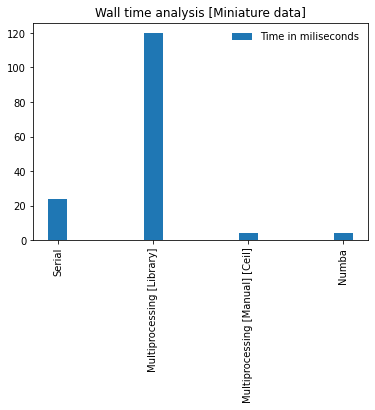

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[23.5, 120, 4.19 , 4.22]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Miniature data = 3 elements]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

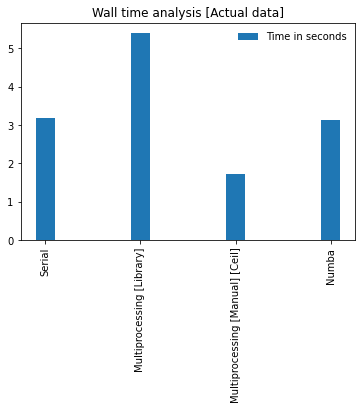

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[3.18 , 5.4, 1.71 , 3.13]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in seconds')

plt.title("Wall time analysis [Actual data=10 files][Create dataframe]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

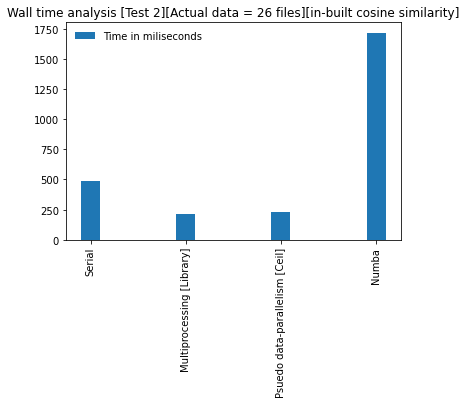

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[485 , 212, 233 ,1720]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in miliseconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][in-built cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

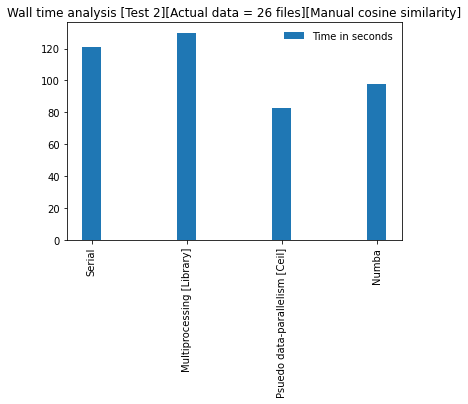

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t=[121 , 130, 82.9 ,97.5]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in seconds')

plt.title("Wall time analysis [Test 2][Actual data = 26 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

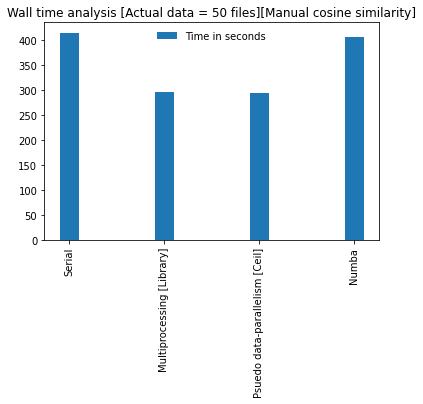

In [71]:
import matplotlib.pyplot as plt
import numpy as np

t=[414 , 295, 292.9 ,405]
ty=["Serial", "Multiprocessing [Library]", "Psuedo data-parallelism [Ceil]" , "Numba"]
nodes= np.arange(len(t))

plt.bar(nodes,t,width=0.2, align='center' ,label='Time in seconds')

plt.title("Wall time analysis [Actual data = 50 files][Manual cosine similarity]")

plt.xticks(nodes,ty,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

# **Module 2: PDF-to-text converter**

In [ ]:
pip install PyPDF2

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [4]:
# importing required modules 
import PyPDF2 

In [5]:
student_files_pdf = [doc for doc in os.listdir() if doc.endswith('.pdf')]
student_files_pdf

['Web1.pdf',
 'Cloud2.pdf',
 'Foucault6.pdf',
 'ML1.pdf',
 'Shake4.pdf',
 'Sports4.pdf',
 'Shake1.pdf',
 'Stars3.pdf',
 'Stars5.pdf',
 'Shake5.pdf',
 'Sports7.pdf',
 'Stars4.pdf',
 'Shake2.pdf',
 'Foucault3.pdf',
 'Cloud1.pdf',
 'Sports1.pdf',
 'Sports10.pdf',
 'Stars2.pdf',
 'Shake8.pdf',
 'Foucault2.pdf',
 'ML2.pdf',
 'Foucault7.pdf',
 'Sports8.pdf',
 'Shake6.pdf',
 'Stars6.pdf',
 'Sports6.pdf',
 'Sports2.pdf',
 'Sports5.pdf',
 'Gender1.pdf',
 'Foucault4.pdf',
 'Shake10.pdf',
 'PatFem3.pdf',
 'Capitalism.pdf',
 'Shake3.pdf',
 'Shake9.pdf',
 'Stars1.pdf',
 'Shake7.pdf',
 'Cloud3(Lang).pdf',
 'Web2.pdf',
 'Foucault5.pdf',
 'Foucault1.pdf',
 'PatFem4.pdf',
 'Sports3.pdf',
 'Foucault8.pdf',
 'Web3.pdf',
 'Sports9.pdf']

In [6]:
# creating a pdf file object 
def convert(path):

  pin='/content/'+path
  print(f"Converting {pin.split('/')[-1]}...")
  pout=pin[:-4]+".txt"
  print(pout)
  pdfFileObj = open(pin, 'rb') 
      
  # creating a pdf reader object 
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
      
  # printing number of pages in pdf file 
  print(f"Number of pages: {pdfReader.numPages}") 
      
  # creating a page object 
  s=""
  for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i) 
      
    # extracting text from page 
    s+=pageObj.extractText()
  print(f"Writing contents of {pin} to {pout}")
  myText = open(pout,'w')

  
  myText.write(s)
  myText.close()
  pdfFileObj.close()
  print('_'*100)

# closing the pdf file object 


In [7]:
for i in student_files_pdf:
  try:
    path=i
    convert(i)
  except:
    print("Cannot convert",i)
    print('_'*100)

Converting Web1.pdf...
/content/Web1.txt
Number of pages: 7
Writing contents of /content/Web1.pdf to /content/Web1.txt
____________________________________________________________________________________________________
Converting Cloud2.pdf...
/content/Cloud2.txt
Number of pages: 133


Writing contents of /content/Cloud2.pdf to /content/Cloud2.txt
____________________________________________________________________________________________________
Converting Foucault6.pdf...
/content/Foucault6.txt
Number of pages: 3
Writing contents of /content/Foucault6.pdf to /content/Foucault6.txt
____________________________________________________________________________________________________
Converting ML1.pdf...
/content/ML1.txt
Number of pages: 18
Writing contents of /content/ML1.pdf to /content/ML1.txt
____________________________________________________________________________________________________
Converting Shake4.pdf...
/content/Shake4.txt
Number of pages: 11
Writing contents of /content/Shake4.pdf to /content/Shake4.txt
____________________________________________________________________________________________________
Converting Sports4.pdf...
/content/Sports4.txt
Number of pages: 2
Writing contents of /content/Sports4.pdf to /content/Sports4.txt
___________________



---


# **Rough space**

In [ ]:
a=[1,2,5,3,4]
b=[1,2,4,5,6]
dot(a, b)/(norm(a)*norm(b))

In [ ]:
import sys
import time
for i in range(10):
    a="Loading" + "." * i
    sys.stdout.write("\r"+a) # Cursor up one line
    time.sleep(1)

Loading.........

In [ ]:
for data in ans:
  for rowName in range(len(student_files)):
    if df.index[rowName]==data[0]:
      r=rowName
      for colName in range(len(student_files)):
        if df.index[colName]==data[1]:
          c=colName

          df.iloc[r,c] = data[2]
df

In [ ]:
df=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
df

In [ ]:
df2=pd.DataFrame(np.zeros((len(student_files),len(student_files))),index=student_files,columns=student_files)
df2

,juma.txt,fatma.txt,john.txt
juma.txt,0.0,0.0,0.0
fatma.txt,0.0,0.0,0.0
john.txt,0.0,0.0,0.0


In [ ]:
for data in a:
  for rowName in range(len(student_files)):
    if df2.index[rowName]==data[0]:
      r=rowName
      for colName in range(len(student_files)):
        if df2.index[colName]==data[1]:
          c=colName

          df2.iloc[r,c] = data[2]
df2

,juma.txt,fatma.txt,john.txt
juma.txt,1.000000,0.186434,0.546597
fatma.txt,0.186434,1.000000,0.148069
john.txt,0.546597,0.148069,1.000000


In [ ]:
from numba import jit


def sq(n):
  s=0
  for i in range(n):
    s+=i**2
  print(s)


In [ ]:
%%time
sq(100000)

333328333350000
CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 31.5 ms


In [ ]:
from numba import jit

# @jit(nopython=True)
def sq2(n):
  s=0
  for i in range(n):
    s+=i**2
  print(s)


In [ ]:
%%time
ans=jit(nopython=True)(sq2)

CPU times: user 238 µs, sys: 28 µs, total: 266 µs
Wall time: 270 µs


In [ ]:
%%time 
ans(100000)

333328333350000
CPU times: user 138 µs, sys: 4 µs, total: 142 µs
Wall time: 101 µs
